## Importing soundings

This code is useful for importing soundings, which is used in the hail-detection codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.plots import SkewT
from datetime import datetime, timedelta
from metpy.units import units
import metpy.calc as metcalc

In [2]:
dataset = WyomingUpperAir.request_data(datetime(2019,5,28,0), 'ILX')


#get_ipython().run_line_magic('matplotlib', 'inline')

p = dataset['pressure'].values * units(dataset.units['pressure'])
#ip100 = np.where(p.magnitude==100.)[0][0]+1
#p = p[:ip100]
T = dataset['temperature'].values * units(dataset.units['temperature'])
#T = T[:ip100]
Td = dataset['dewpoint'].values * units(dataset.units['dewpoint'])
#Td = Td[:ip100]
u = dataset['u_wind'].values * units(dataset.units['u_wind'])
#u = u[:ip100]
v = dataset['v_wind'].values * units(dataset.units['v_wind'])
#v = v[:ip100]

/home/amedendorp/.conda/envs/hail_env/lib/python3.6/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


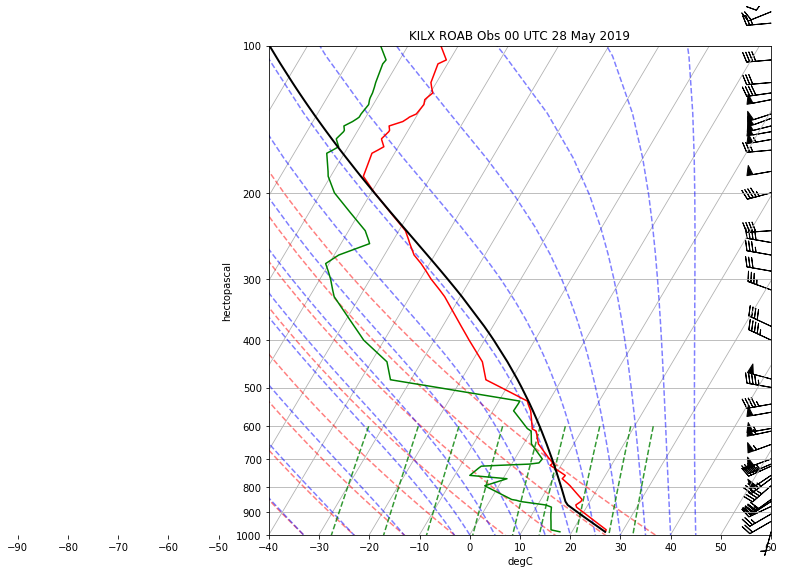

In [3]:
fig = plt.figure(figsize=(9,9))
skew = SkewT(fig)
skew.plot(p,T,'r')
skew.plot(p,Td,'g')
skew.plot_barbs(p[:-1:2], u[:-1:2], v[:-1:2])
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-40,60)
prof = metcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)
plt.title('KILX ROAB Obs 00 UTC 28 May 2019', loc='center')
# plt.savefig('/home/jhemedinger/suli_projects/chicago-nowcast/images/ilx_sounding_00UTC.png', dpi=300)
plt.show()

In [4]:
p = np.array(dataset['pressure'].values * units(dataset.units['pressure']))
T = np.array(dataset['temperature'].values * units(dataset.units['temperature']))
Td = np.array( dataset['dewpoint'].values * units(dataset.units['dewpoint']))
u = np.array(dataset['u_wind'].values * units(dataset.units['u_wind']))
v = np.array(dataset['v_wind'].values * units(dataset.units['v_wind']))
z = np.array(dataset['height'].values * units(dataset.units['height']))

In [5]:
import xarray
ds = xarray.Dataset()

ds['temp'] = T
ds['height'] = z

In [6]:
ds.to_netcdf('/home/amedendorp/Desktop/Sounding.nc')

In [7]:
ds = xarray.open_dataset('/home/amedendorp/Desktop/Sounding.nc')

In [8]:
import netCDF4
ds = netCDF4.Dataset('/home/amedendorp/Desktop/Sounding.nc')
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): temp(120), height(120)
    variables(dimensions): float64 temp(temp), int64 height(height)
    groups: 